# picture to RFU CLI

In [1]:
import pathlib
import skimage
import cv2
import numpy as np
import pandas as pd
from skimage import feature
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math
%matplotlib inline


In [2]:
res_dir = pathlib.Path('F:/device/optics/results/pix2rfu_32w')

In [3]:
temp_li = ['Low Temp', 'High Temp']
x_range = slice(500, 1800)
y_range = slice(500, 1800)
colors_li = [plt.cm.get_cmap('hsv', 30)(i) for i in range(30)]
ch_dict = {
    'c': 'CalRed',
    'f': 'FAM',
    'q6': 'Q670',
    'q7': 'Q705',
    'h': 'HEX'
}

In [4]:
divmod(4, 2)

(2, 0)

In [5]:
im_dir = pathlib.Path('F:/device\optics/images/20190319 Dye calibration plate test/hex/main')

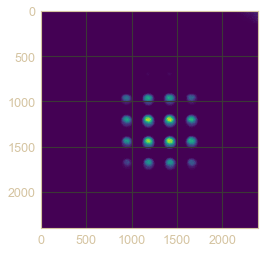

In [6]:
im = np.array(Image.open(im_dir/'1_0_h.jpg'))
im_sum = im.sum(axis=2)
plt.imshow(im_sum)

In [11]:
x_range = slice(600, 2000)
y_range = slice(600, 1800)
for channel in ['c', 'f', 'q6', 'h', 'q7']:
    _li = []
    for im_dir in im_dir_li:
        _li.append(im_dir/f'44_0_{channel}.jpg')
    fig, ax = plt.subplots(3, 2, figsize=(12, 18))
    for i in range(len(_li)):
        col, row = divmod(i, 2)
        im = np.array(Image.open(_li[i]))
        im_sum = skimage.transform.rotate(im.sum(axis=2), 180)

        im_cropped = im_sum[y_range, x_range]
        thresh_sum = skimage.filters.threshold_otsu(im_cropped)
        threshed_im_sum = im_cropped > thresh_sum
        cleared = skimage.segmentation.clear_border(threshed_im_sum)
        bw = skimage.morphology.closing(cleared, skimage.morphology.disk(3))
        bw2 = skimage.morphology.opening(bw, skimage.morphology.disk(3))
        im_labeled = skimage.measure.label(bw2)
        im_res = skimage.color.label2rgb(im_labeled, bg_label=0,
                                         colors=colors_li)

        ax[col, row].imshow(im_res)
        ax[col, row].set_title(f'{_li[i].parent.name} - {_li[i].name}')

NameError: name 'im_dir_li' is not defined